# Climate Data Exploratory Data Analysis

## Introduction
This notebook contains an exploratory data analysis of climate data from 1900 to 2023. The dataset includes global temperatures, CO2 concentration, sea level rise, and Arctic ice area.

Your task is to perform a comprehensive EDA following the requirements in the README.md file.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline

## 1. Data Preparation

Load the climate data and perform necessary cleaning and aggregation.

In [2]:
# Load the dataset
df = pd.read_csv('data/Climate_Change_Indicators.csv') # Place the correct path to the file you are reading here (Make sure to load using the relative path)

# Display the first few rows of the dataset
df.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
0,1948,13.17,397.04,116.25,5.97
1,1996,13.10,313.17,277.92,9.66
2,2015,14.67,311.95,290.32,8.40
3,1966,14.79,304.25,189.71,11.83
4,1992,13.15,354.52,14.84,11.23


In [3]:
# Check for missing values and basic information about the dataset
print("Dataset Information:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 5 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   Year                             1048576 non-null  int64  
 1   Global Average Temperature (°C)  1048576 non-null  float64
 2   CO2 Concentration (ppm)          1048576 non-null  float64
 3   Sea Level Rise (mm)              1048576 non-null  float64
 4   Arctic Ice Area (million km²)    1048576 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 40.0 MB
None

Missing Values:
Year                               0
Global Average Temperature (°C)    0
CO2 Concentration (ppm)            0
Sea Level Rise (mm)                0
Arctic Ice Area (million km²)      0
dtype: int64


In [4]:
# TODO: Aggregate data by year to create a 124-year time series
df['Year'] = pd.to_datetime(df['Year'], format='%Y')  # Convert 'Year' to datetime
df_yearly = df.groupby(df['Year'].dt.year).mean()  # Group by year and calculate the mean for each variable

# Display the aggregated data
df_yearly.head()

,Year,Global Average Temperature (°C),CO2 Concentration (ppm),Sea Level Rise (mm),Arctic Ice Area (million km²)
Year,,,,,
1900,1900-01-01,14.506663,350.373405,150.408288,8.978659
1901,1901-01-01,14.485343,349.757140,150.548828,8.947272
1902,1902-01-01,14.476262,349.299686,152.174821,9.035554
1903,1903-01-01,14.492360,349.644375,150.138338,9.056501
1904,1904-01-01,14.494241,349.537032,150.667318,8.990691


## 2. Univariate Analysis

Analyze each climate variable independently.

Descriptive Statistics:

       Global Average Temperature (°C)  CO2 Concentration (ppm)  \
count                       124.000000               124.000000   
mean                         14.499538               350.028626   
std                           0.009960                 0.456535   
min                          14.474559               348.642249   
25%                          14.492782               349.691692   
50%                          14.499496               350.022334   
75%                          14.504872               350.367023   
max                          14.527762               351.003294   

       Sea Level Rise (mm)  Arctic Ice Area (million km²)  
count           124.000000                     124.000000  
mean            149.988859                       9.000886  
std               1.032095                       0.037547  
min             148.051748                       8.893453  
25%             149.207437                       8.978851  
50%        

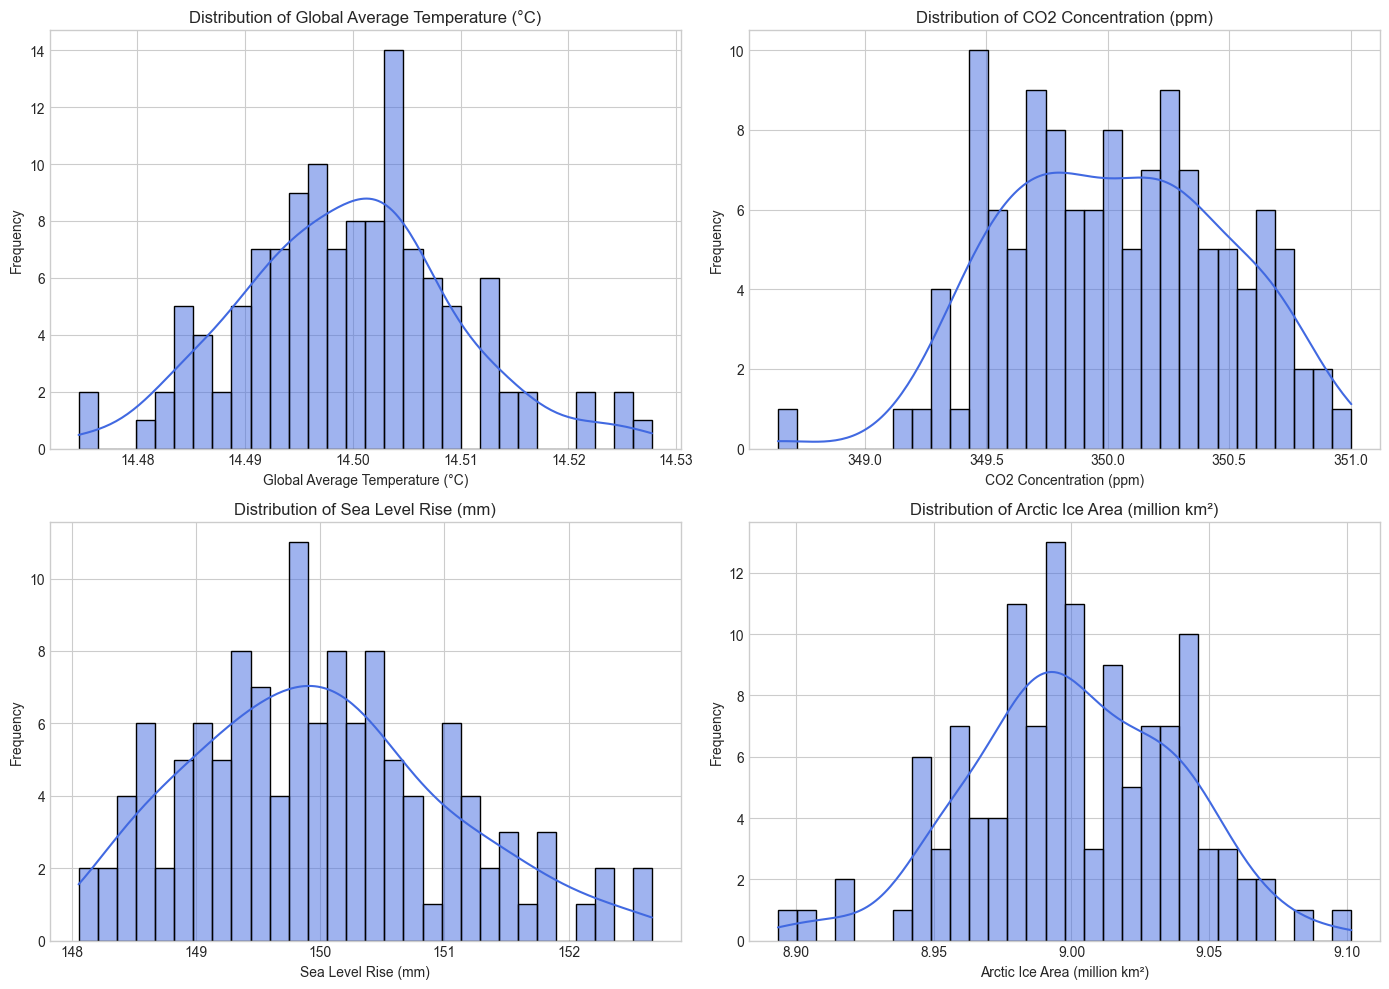

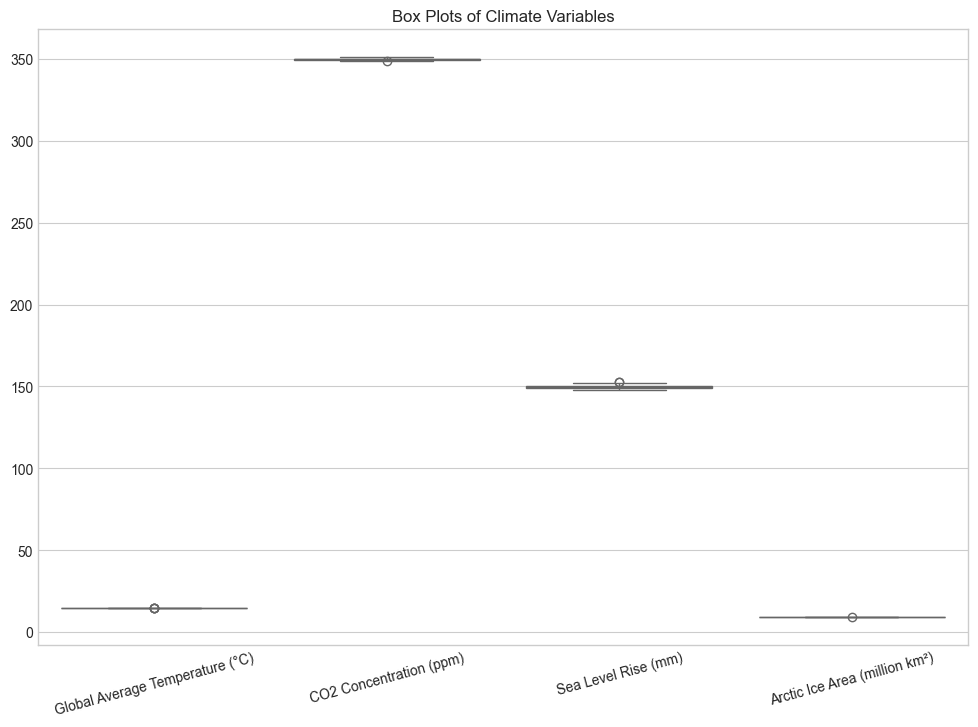

In [6]:
# TODO: Perform univariate analysis for each climate variable
# Include descriptive statistics and appropriate visualizations
climate_variables = [
    "Global Average Temperature (°C)",
    "CO2 Concentration (ppm)",
    "Sea Level Rise (mm)",
    "Arctic Ice Area (million km²)"
]

# Descriptive Statistics
print("Descriptive Statistics:\n")
print(df_yearly[climate_variables].describe())

# Visualizing Each Variable
plt.figure(figsize=(14, 10))

for i, col in enumerate(climate_variables, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_yearly[col], bins=30, kde=True, color="royalblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Box Plots for Outlier Detection
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_yearly[climate_variables], palette="coolwarm")
plt.title("Box Plots of Climate Variables")
plt.xticks(rotation=15)
plt.show()

## 3. Bivariate Analysis

Explore relationships between pairs of climate variables.

In [ ]:
# TODO: Perform bivariate analysis
# Include correlation analysis and appropriate visualizations
# Your code here

## 4. Multivariate Analysis

Investigate relationships among three or more variables.

In [ ]:
# TODO: Perform multivariate analysis
# Create advanced visualizations showing multiple variables
# Your code here

## 5. Conclusions and Insights

Summarize your findings and discuss their implications.

# TODO: Write your conclusions here